# Libraries

In [196]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [243]:
df = pd.read_csv('Data\Housedata.csv')

In [198]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407890 entries, 0 to 407889
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          407890 non-null  object 
 1   bed             320108 non-null  float64
 2   bath            321618 non-null  float64
 3   acre_lot        331873 non-null  float64
 4   city            407838 non-null  object 
 5   state           407890 non-null  object 
 6   zip_code        407693 non-null  float64
 7   house_size      324365 non-null  float64
 8   prev_sold_date  140950 non-null  object 
 9   price           407890 non-null  float64
dtypes: float64(6), object(4)
memory usage: 31.1+ MB


In [200]:
#Check the number of missing value
df.prev_sold_date.isnull().sum()

266940

In [201]:
df.shape

(407890, 10)

In [202]:
# Drop prev_sold_date because the missing value is around 70%
df.drop(columns='prev_sold_date', inplace=True)
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,65000.0


In [203]:
#Check the number of unique value for object datatypes
df.select_dtypes(include='object').nunique()

status       2
city      1412
state       15
dtype: int64

In [204]:
# Drop city because the number of unique value for object datatypes is alot
df.drop(columns='city', inplace=True)
df.head()

,status,bed,bath,acre_lot,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Puerto Rico,601.0,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Puerto Rico,601.0,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Puerto Rico,795.0,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Puerto Rico,731.0,1800.0,145000.0
4,for_sale,6.0,2.0,0.05,Puerto Rico,680.0,NaN,65000.0


In [205]:
#Drop the duplicate rows
df.drop(columns='zip_code', inplace=True)
df.head()

,status,bed,bath,acre_lot,state,house_size,price
0,for_sale,3.0,2.0,0.12,Puerto Rico,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Puerto Rico,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Puerto Rico,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Puerto Rico,1800.0,145000.0
4,for_sale,6.0,2.0,0.05,Puerto Rico,NaN,65000.0


In [206]:
filtered_data = df[(df['bed'] <= 20) & (df['acre_lot'] < 30) & (df['bath'] <= 17) & (df['price'] < 1000000)]

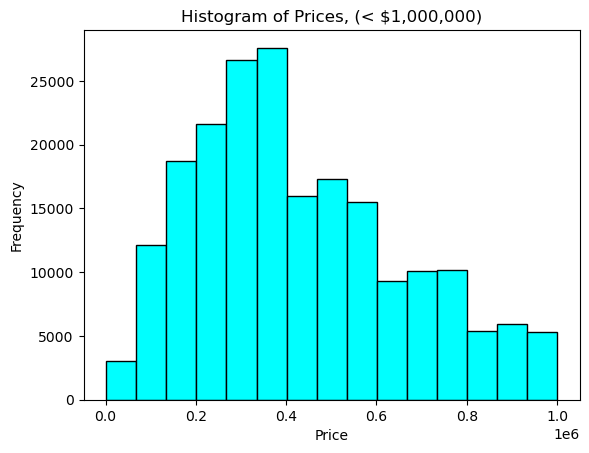

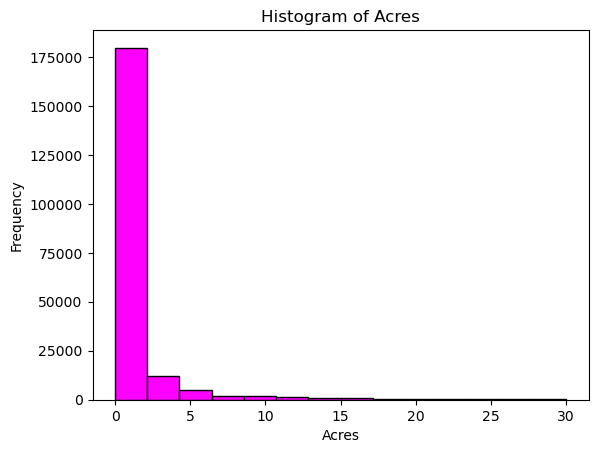

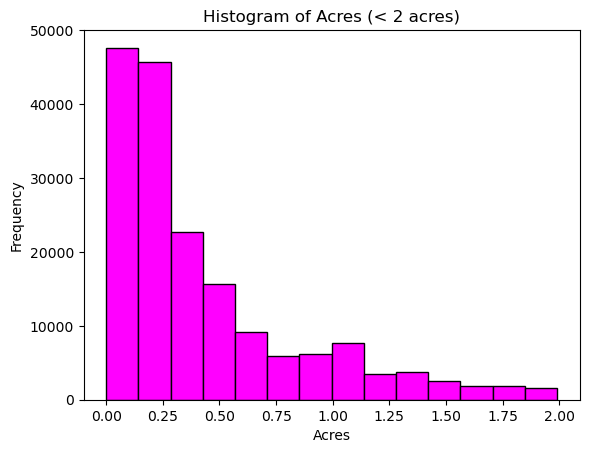

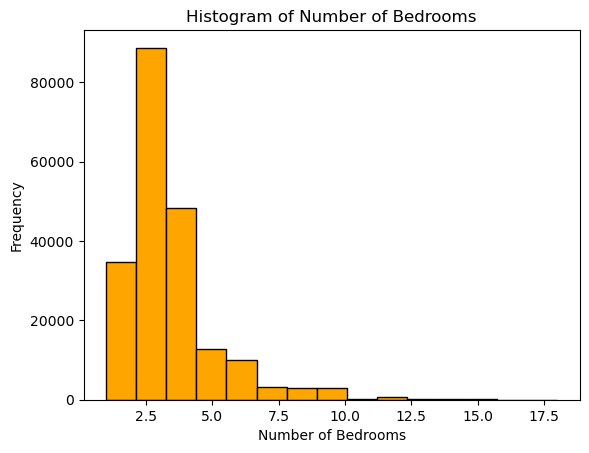

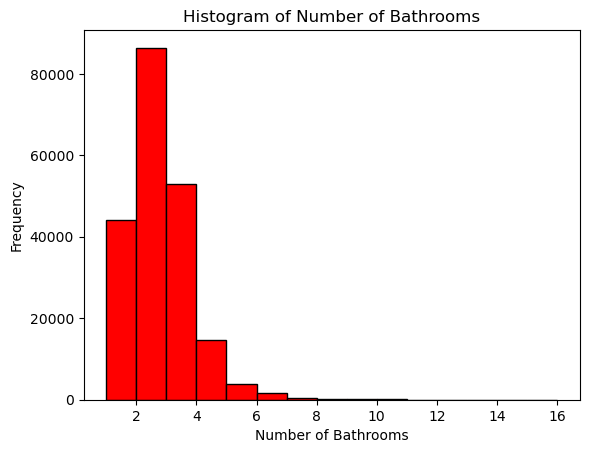

In [207]:
# Create a histogram for the 'price' variable
plt.hist(filtered_data['price'], bins=15, color='cyan', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices, (< $1,000,000)')
plt.show()

# Create a histogram for the 'acre_lot' variable
plt.hist(filtered_data['acre_lot'], bins=14, color='magenta', edgecolor='black')
plt.xlabel('Acres')
plt.ylabel('Frequency')
plt.title('Histogram of Acres')
plt.show()


filtered_acres = filtered_data[filtered_data['acre_lot'] < 2]
# Create a histogram for the 'acre_lot' variable, but filtered 
plt.hist(filtered_acres['acre_lot'], bins=14, color='magenta', edgecolor='black')
plt.xlabel('Acres')
plt.ylabel('Frequency')
plt.title('Histogram of Acres (< 2 acres)')
plt.show()


# Create a histogram for the 'bed' variable
plt.hist(filtered_data['bed'], bins=15, color='orange', edgecolor='black')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bedrooms')
plt.show()

# Create a histogram for the 'bath' variable
plt.hist(filtered_data['bath'], bins=15, color='red', edgecolor='black')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bathrooms')
plt.show()

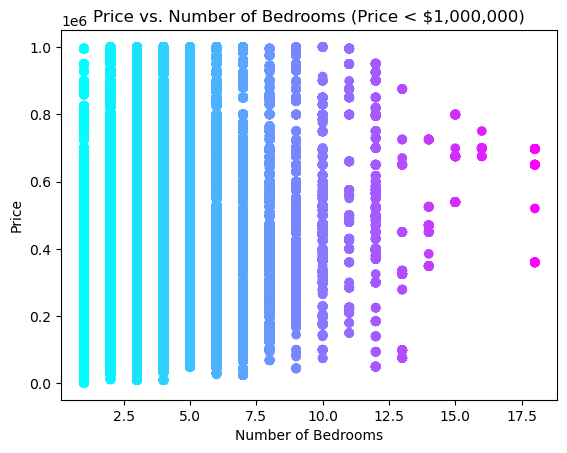

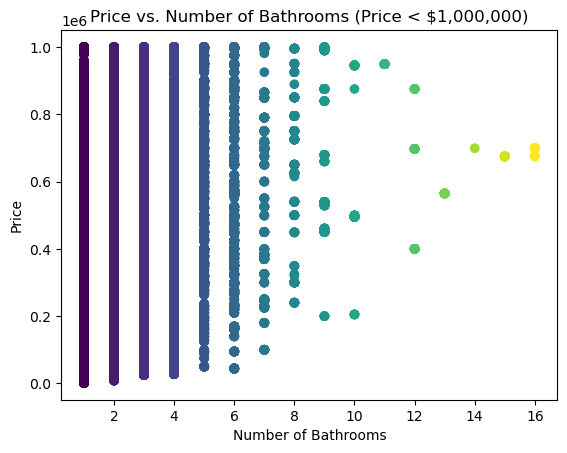

In [208]:
# Plot the price against the number of bedrooms for the filtered data
plt.scatter(filtered_data['bed'], filtered_data['price'], c=filtered_data['bed'], cmap='cool')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price vs. Number of Bedrooms (Price < $1,000,000)')
plt.show()

# Plot the price against the number of bathrooms
plt.scatter(filtered_data['bath'], filtered_data['price'], c=filtered_data['bath'], cmap='viridis')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Price vs. Number of Bathrooms (Price < $1,000,000)')
plt.show()

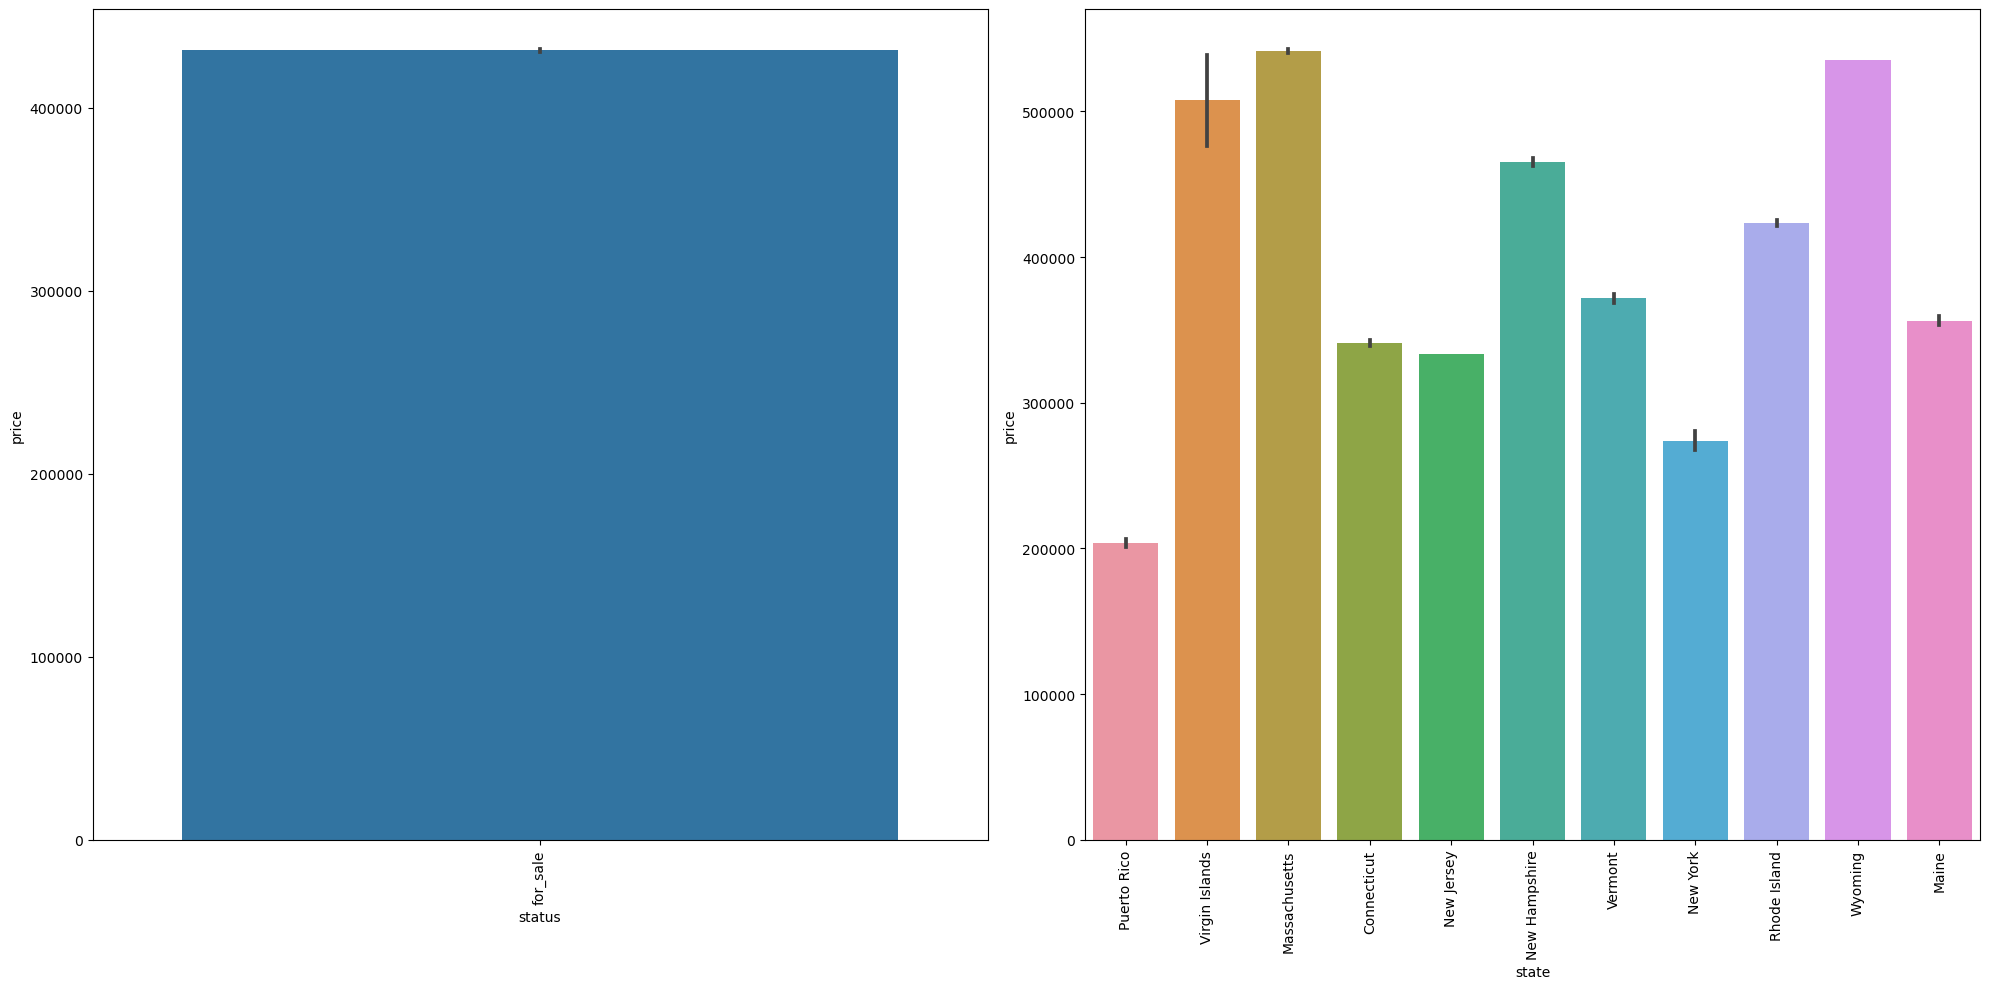

In [209]:
# list of categorical variables to plot
cat_vars = ['status', 'state']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price', data=filtered_data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

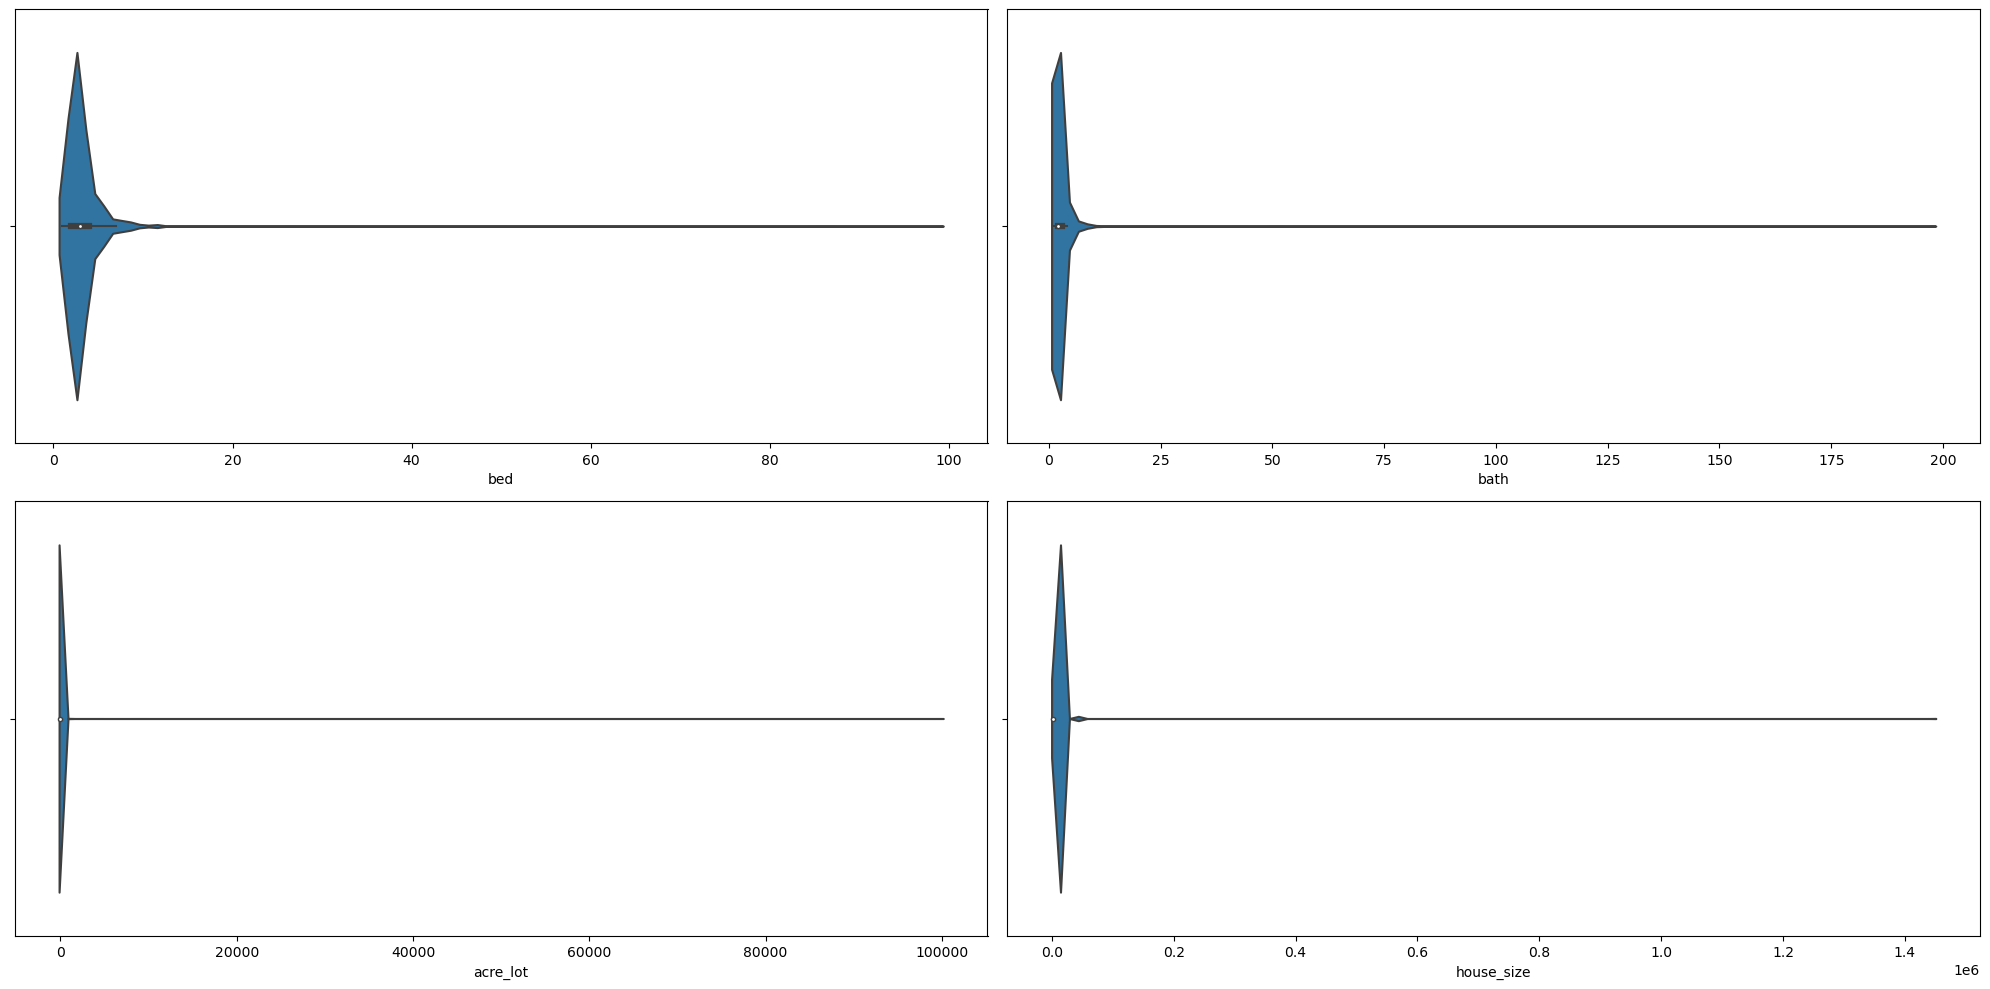

In [210]:
num_vars = ['bed', 'bath', 'acre_lot', 'house_size']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

In [211]:
check_missing = filtered_data.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

house_size    0.152002
dtype: float64

Fill null value with median and mean

In [212]:
filtered_data['bed'].fillna(df['bed'].median(), inplace=True)
filtered_data['bath'].fillna(df['bath'].median(), inplace=True)
filtered_data['house_size'].fillna(df['house_size'].mean(), inplace=True)
filtered_data['acre_lot'].fillna(df['acre_lot'].mean(), inplace=True)

C:\Users\sogut\AppData\Local\Temp\ipykernel_12896\2984819755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['bed'].fillna(df['bed'].median(), inplace=True)
C:\Users\sogut\AppData\Local\Temp\ipykernel_12896\2984819755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['bath'].fillna(df['bath'].median(), inplace=True)
C:\Users\sogut\AppData\Local\Temp\ipykernel_12896\2984819755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [213]:
filtered_data.head()

,status,bed,bath,acre_lot,state,house_size,price
0,for_sale,3.0,2.0,0.12,Puerto Rico,920.000000,105000.0
1,for_sale,4.0,2.0,0.08,Puerto Rico,1527.000000,80000.0
2,for_sale,2.0,1.0,0.15,Puerto Rico,748.000000,67000.0
3,for_sale,4.0,2.0,0.10,Puerto Rico,1800.000000,145000.0
4,for_sale,6.0,2.0,0.05,Puerto Rico,2222.782865,65000.0


In [214]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in filtered_data.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {filtered_data[col].unique()}")

status: ['for_sale']
state: ['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut' 'New Jersey'
 'New Hampshire' 'Vermont' 'New York' 'Rhode Island' 'Wyoming' 'Maine']


This code uses LabelEncoder to convert categorical values in each selected column to numeric labels.
The original values are replaced with their corresponding encoded values in the DataFrame.

In [215]:


for col in filtered_data.select_dtypes(include=['object']).columns:
    
    label_encoder = preprocessing.LabelEncoder()
    
    label_encoder.fit(filtered_data[col].unique())
    
    filtered_data[col] = label_encoder.transform(filtered_data[col])
    
    print(f"{col}: {filtered_data[col].unique()}")

status: [0]
state: [ 6  9  2  0  4  3  8  5  7 10  1]


C:\Users\sogut\AppData\Local\Temp\ipykernel_12896\3514450004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col] = label_encoder.transform(filtered_data[col])
C:\Users\sogut\AppData\Local\Temp\ipykernel_12896\3514450004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col] = label_encoder.transform(filtered_data[col])


This function is designed to detect and remove outliers from the dataset using the IQR method. Outliers are data that differ significantly from other data points or have abnormal values. Outliers can cause undesirable results in statistical analysis, model building or data visualization and can make results misleading.

For each column specified in columns, the function calculates the first quartile (q1), third quartile (q3), and the interquartile range (iqr) using the quantile method.
It then calculates the lower bound and upper bound for outliers using the formula: lower_bound = q1 - 1.5 * iqr and upper_bound = q3 + 1.5 * iqr.
Finally, the function filters the DataFrame df to include only rows where the values in the specified columns fall within the calculated bounds.
After defining the function, you specify the columns you want to remove outliers from (columns_to_check) as ['bed', 'bath', 'acre_lot', 'house_size'].

In [216]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_check = ['bed', 'bath', 'acre_lot', 'house_size']

df_clean = remove_outliers_iqr(filtered_data, columns_to_check)

df_clean.head()

,status,bed,bath,acre_lot,state,house_size,price
0,0,3.0,2.0,0.12,6,920.0,105000.0
1,0,4.0,2.0,0.08,6,1527.0,80000.0
2,0,2.0,1.0,0.15,6,748.0,67000.0
3,0,4.0,2.0,0.10,6,1800.0,145000.0
5,0,4.0,3.0,0.46,6,2520.0,179000.0


<Axes: >

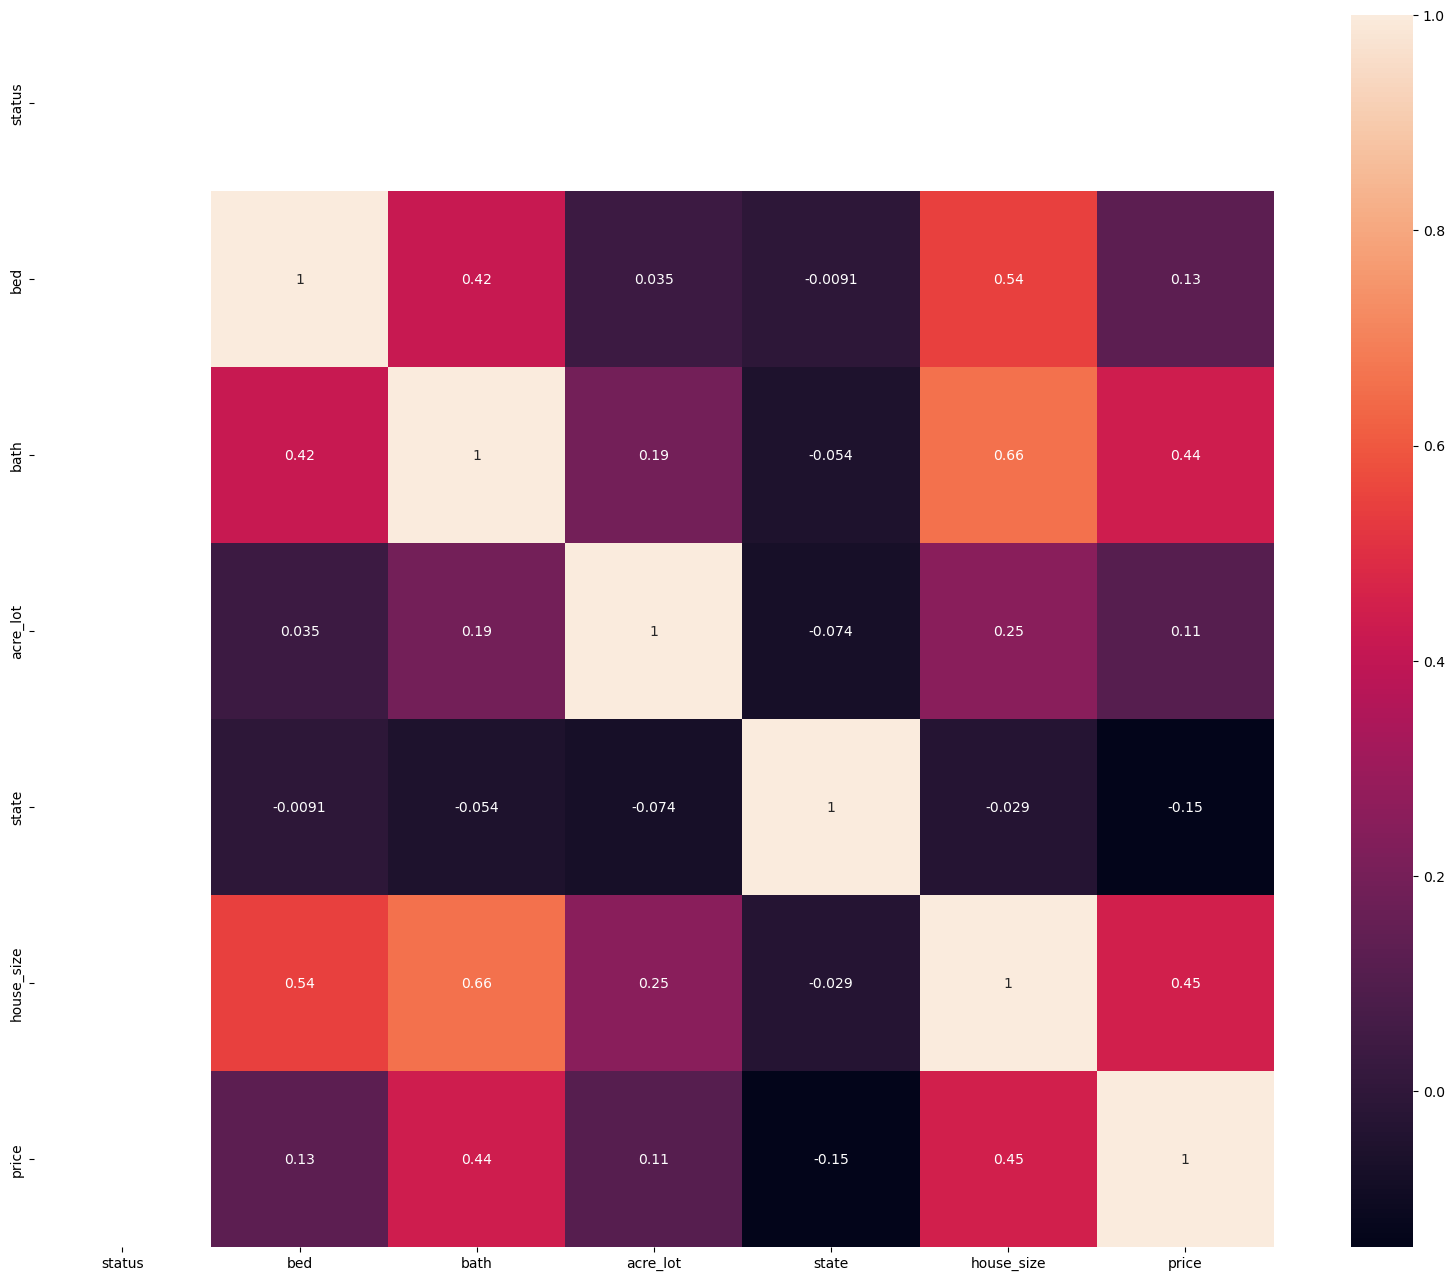

In [217]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(method='pearson'), fmt='.2g', annot=True)

In [218]:
df_clean.drop(columns='bath', inplace=True)
df_clean.head()

,status,bed,acre_lot,state,house_size,price
0,0,3.0,0.12,6,920.0,105000.0
1,0,4.0,0.08,6,1527.0,80000.0
2,0,2.0,0.15,6,748.0,67000.0
3,0,4.0,0.10,6,1800.0,145000.0
5,0,4.0,0.46,6,2520.0,179000.0


In [219]:
X = df_clean.drop('price', axis=1)
y = df_clean['price']

In [222]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
df.dtypes   

status         object
bed           float64
bath          float64
acre_lot      float64
state          object
house_size    float64
price         float64
dtype: object

In [223]:
rf_model = RandomForestRegressor(random_state=1)
dt_model = DecisionTreeRegressor(random_state=1)

In [224]:
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [225]:
dt_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [226]:
predicted = rf_model.predict(val_X)

In [227]:
predicted2 = dt_model.predict(val_X)

In [228]:
models = {"Random Forest":mean_absolute_error(val_y, predicted), "Decision Tree": mean_absolute_error(val_y, predicted2)}

In [232]:
print(models)

{'Random Forest': 5224.590729142566, 'Decision Tree': 4405.036316845303}


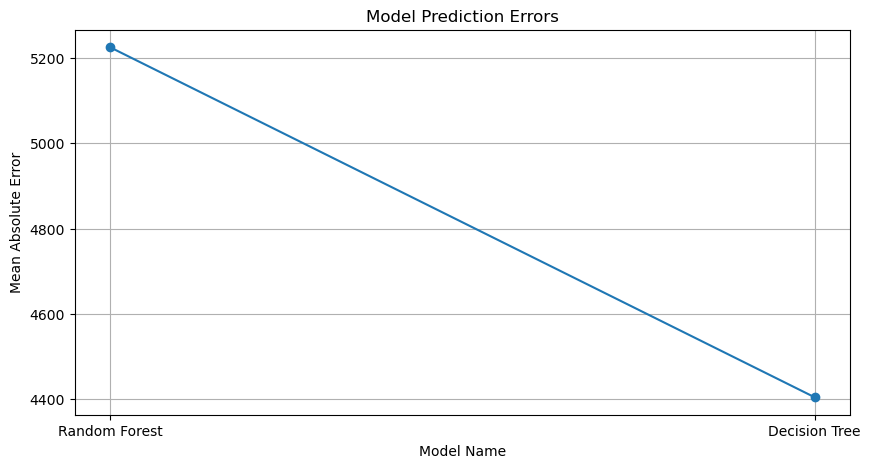

In [235]:
# Prepare error values for plotting
names = list(models.keys())
values = list(models.values())

# We add a sequence number to the x axis because we need numeric values to plot the line graph
x = np.arange(len(names))

# Plot the graph
plt.figure(figsize=(10,5))
plt.plot(x, values, marker='o')
plt.xticks(x, names)
plt.title('Model Prediction Errors')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Model Name')
plt.grid(True)
plt.show()

MAE (Mean Absolute Error) provides the average absolute value of the differences between the predictions and the actual values.
MSE (Mean Squared Error) gives the average of the squares of the prediction errors. It penalizes larger errors more and better captures the overall magnitude of the error made by the model.
R2 (R-squared) measures how good the model's predictions are compared to a simple prediction using the average of the target variable. A value close to 1 indicates that the model's predictions are very close to the actual values, while a value close to 0 indicates that the model's predictions are not very good.

In [238]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted = rf_model.predict(val_X)
predicted2 = dt_model.predict(val_X)

mae_rf = mean_absolute_error(val_y, predicted)
mae_dt = mean_absolute_error(val_y, predicted2)

mse_rf = mean_squared_error(val_y, predicted)
mse_dt = mean_squared_error(val_y, predicted2)

r2_rf = r2_score(val_y, predicted)
r2_dt = r2_score(val_y, predicted2)

print(f"Random Forest MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")
print(f"Decision Tree MAE: {mae_dt:.2f}, MSE: {mse_dt:.2f}, R2: {r2_dt:.2f}")


Random Forest MAE: 5224.59, MSE: 754154553.32, R2: 0.98
Decision Tree MAE: 4405.04, MSE: 871934720.65, R2: 0.98


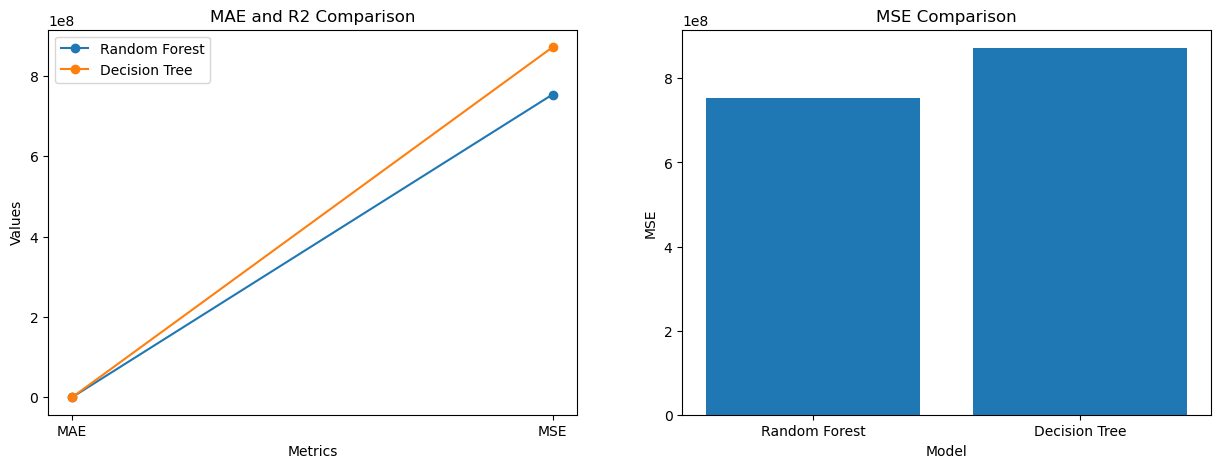

In [241]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Subplot for MAE and R2
axs[0].plot(labels[:-1], metrics_rf[:-1], marker='o', label='Random Forest')
axs[0].plot(labels[:-1], metrics_dt[:-1], marker='o', label='Decision Tree')
axs[0].set_title('MAE and R2 Comparison')
axs[0].set_xlabel('Metrics')
axs[0].set_ylabel('Values')
axs[0].legend()

# Subplot for MSE
axs[1].bar(['Random Forest', 'Decision Tree'], [metrics_rf[1], metrics_dt[1]])
axs[1].set_title('MSE Comparison')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('MSE')

plt.show()
